In [1]:
from timeseries_module.rolling.methods import rolling_median, rolling_std, rolling_quantile,rolling_sum, rolling_mean
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.api.types import is_datetime64_any_dtype

df= pd.read_csv('../output/4threads/rolling.csv')
df.head()

,time,ram_usage_GB,ram_utilization_percent,cpu_utilization_percent,cpu_utilization_percent_roll_mean
0,2025-08-17_21-45-25,7.876648,49.5,43.7,43.700
1,2025-08-17_21-45-26,7.578224,47.6,80.3,62.000
2,2025-08-17_21-45-27,7.842964,49.3,71.3,65.100
3,2025-08-17_21-45-28,7.843349,49.3,75.8,67.775
4,2025-08-17_21-45-29,7.816677,49.1,67.7,67.760


In [2]:
def plot_time_series(df: pd.DataFrame, x: str, y: str, step: int = 10,
                     xmin=None, xmax=None, ymin=None, ymax=None,
                     outlier_method=None,
                     **kwargs):
    xvals = df[x]
    yvals = df[y]

    fig, ax = plt.subplots(figsize=(16, 6))

    if is_datetime64_any_dtype(xvals):
        # Use matplotlib date numbers for BOTH line and scatter
        xv = mdates.date2num(pd.to_datetime(xvals))
        ax.plot_date(xv, yvals, "-", label=y, zorder=2)

        locator = mdates.AutoDateLocator()
        formatter = mdates.ConciseDateFormatter(locator)
        ax.xaxis.set_major_locator(locator)
        ax.xaxis.set_major_formatter(formatter)

        # Optional x-lims if provided
        if xmin is not None or xmax is not None:
            left = mdates.date2num(pd.to_datetime(xmin)) if xmin is not None else None
            right = mdates.date2num(pd.to_datetime(xmax)) if xmax is not None else None
            ax.set_xlim(left=left, right=right)
    else:
        xv = np.arange(len(xvals))
        ax.plot(xv, yvals, label=y, zorder=2)

        # Simple ticks every 10
        if len(xvals) > 0:
            ticks = np.arange(0, len(xvals), step)
            ax.set_xticks(ticks)
            ax.set_xticklabels(xvals.astype(str).iloc[ticks], rotation=45, ha="right")

        if xmin is not None or xmax is not None:
            ax.set_xlim(left=xmin, right=xmax)

    if ymin is not None or ymax is not None:
        ax.set_ylim(bottom=ymin, top=ymax)


    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.legend()
    plt.tight_layout()
    plt.show()



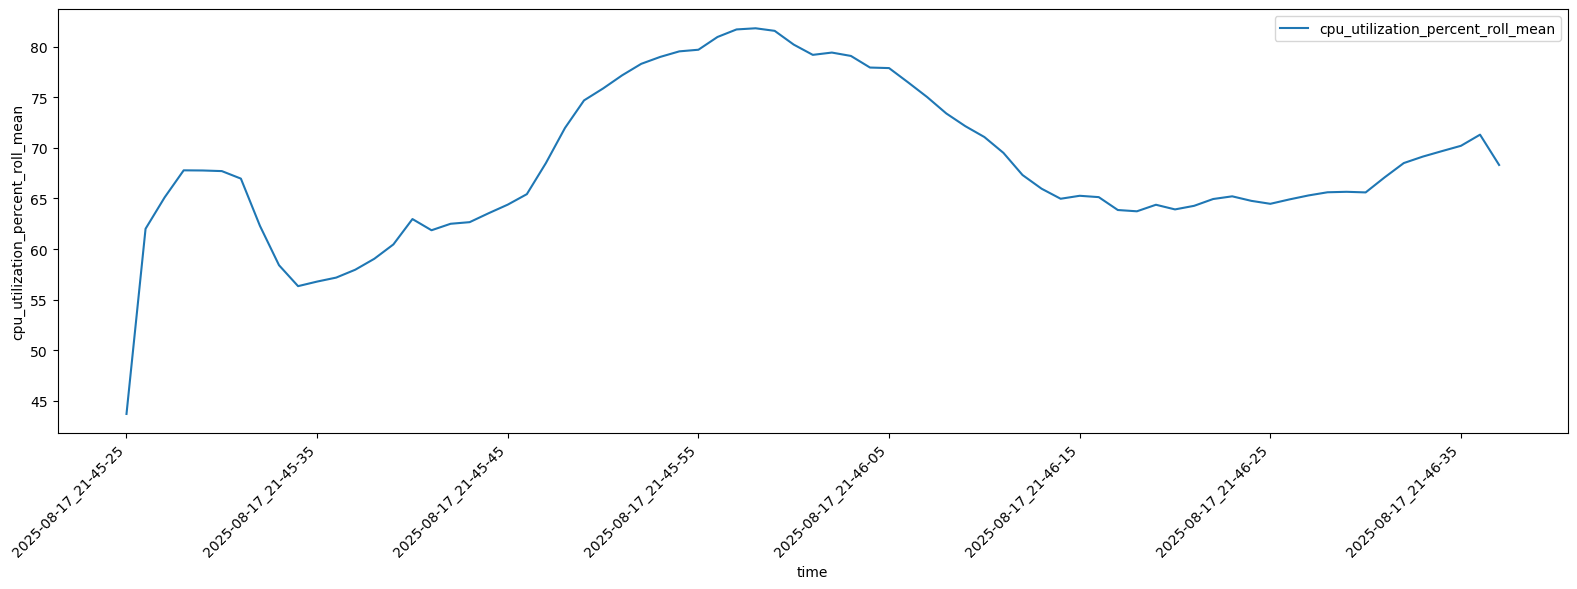

In [3]:
plot_time_series(df=df, x='time', y='cpu_utilization_percent_roll_mean')

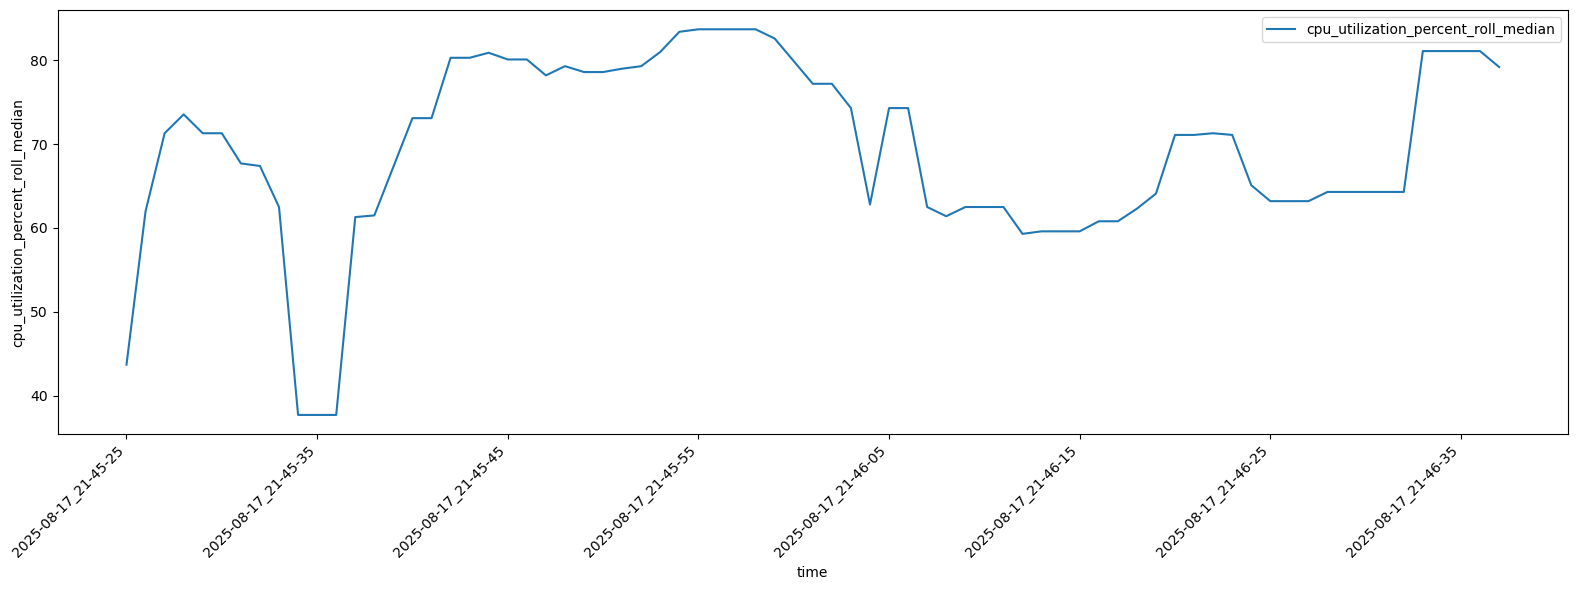

In [4]:
df2= rolling_median(df=df, value_column='cpu_utilization_percent',window= 5)
plot_time_series(df=df2, x='time', y='cpu_utilization_percent_roll_median')

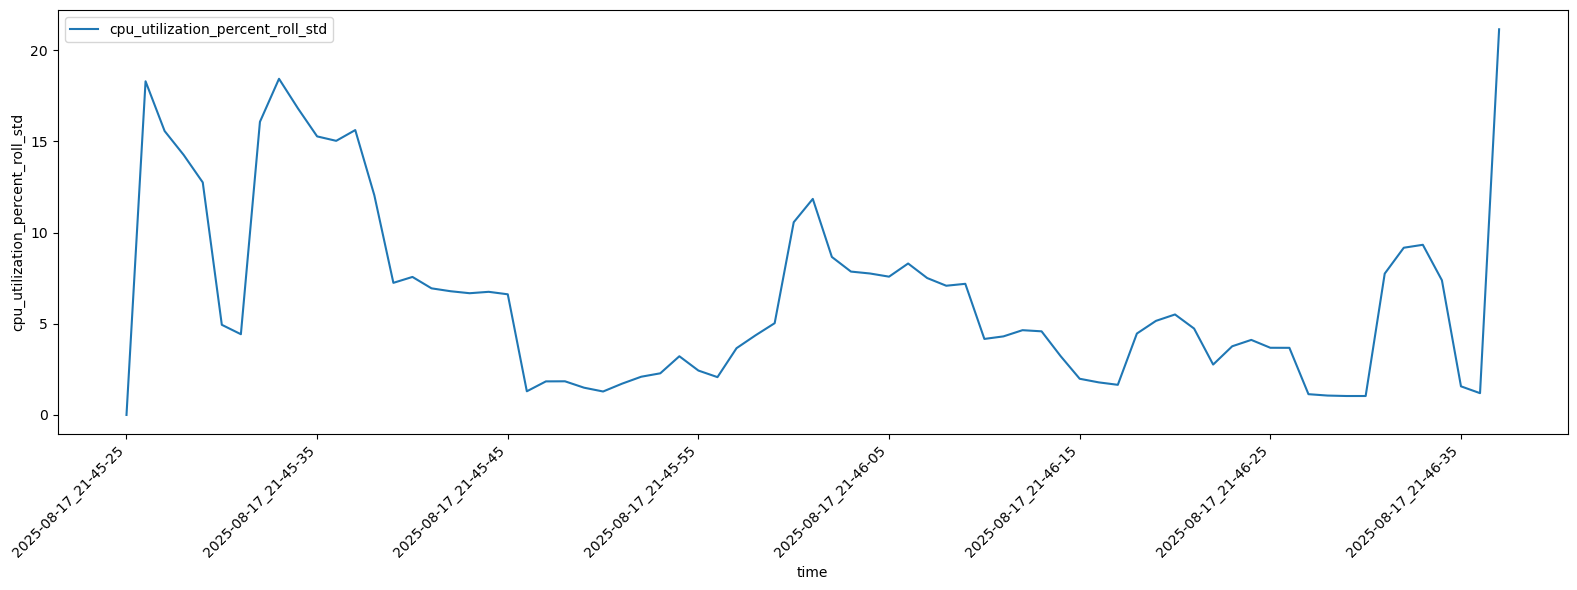

In [5]:
df3= rolling_std(df=df, value_column='cpu_utilization_percent', window= 5)
plot_time_series(df=df3, x='time', y='cpu_utilization_percent_roll_std')

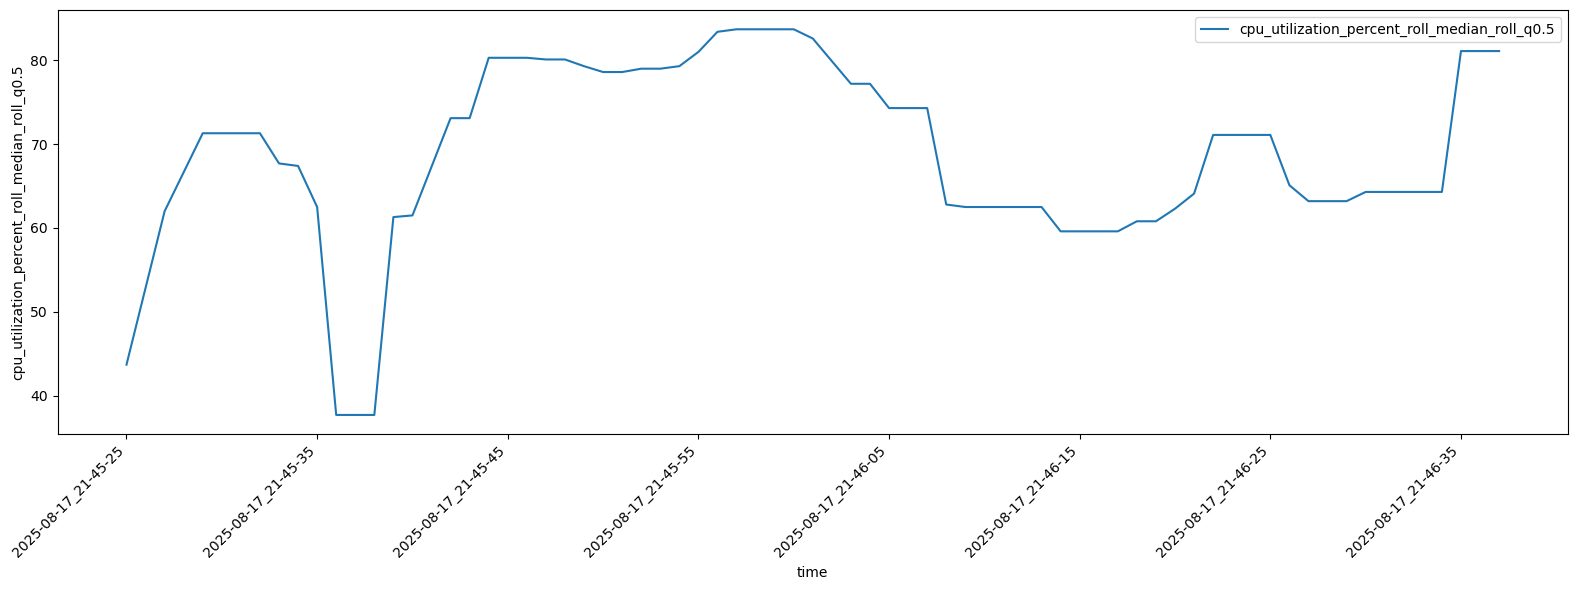

In [6]:
df4= rolling_quantile(df=df2, value_column="cpu_utilization_percent_roll_median", window=5)

plot_time_series(df=df4, x='time', y='cpu_utilization_percent_roll_median_roll_q0.5')

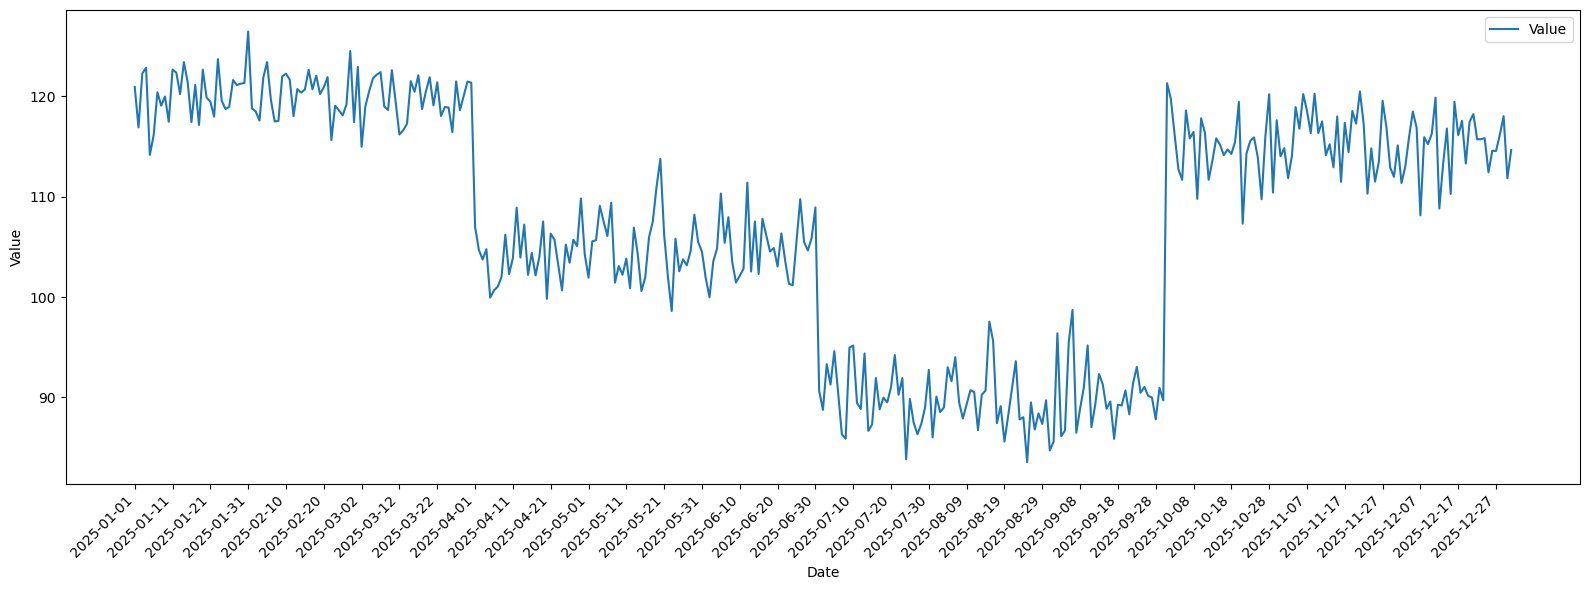

In [7]:
seasonal = pd.read_csv('../data/seasonal_daily_2025.csv')
plot_time_series(seasonal,x='Date', y='Value')

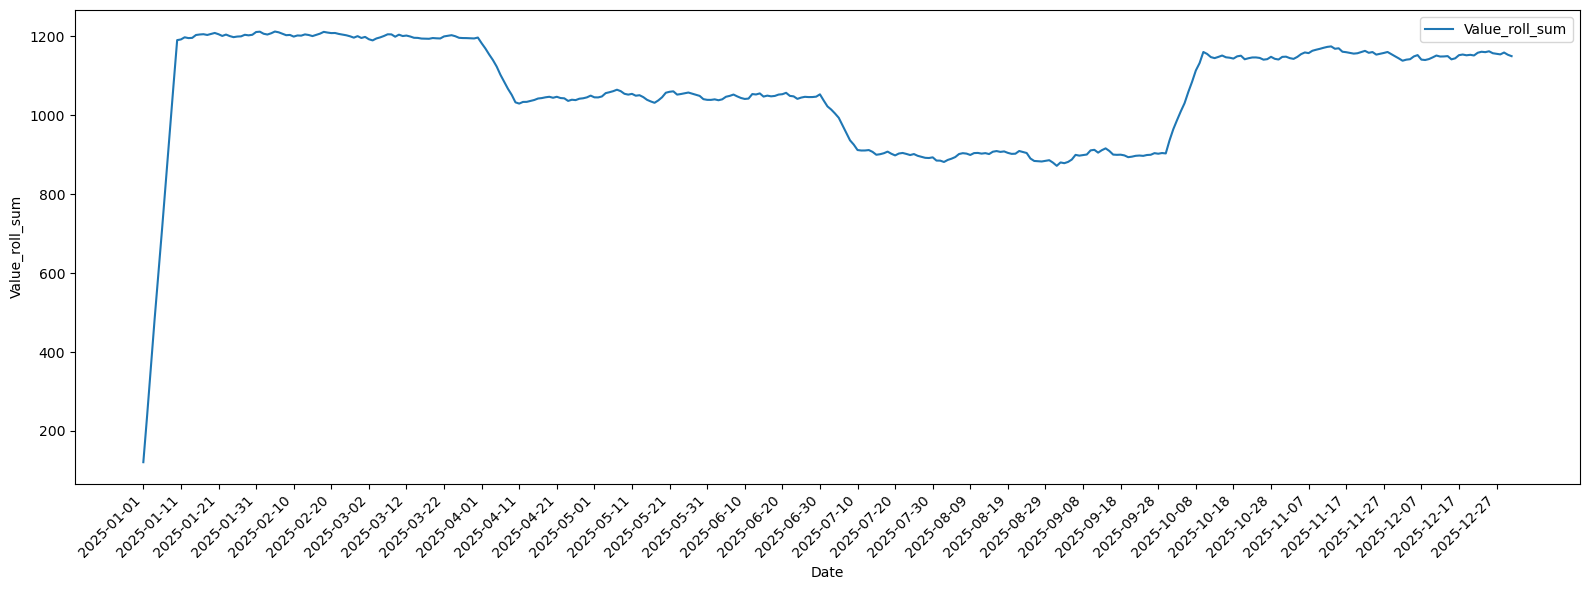

In [8]:
seasonal_sum= rolling_sum(df=seasonal, value_column='Value', window=10)
plot_time_series(df=seasonal_sum, x='Date', y='Value_roll_sum')

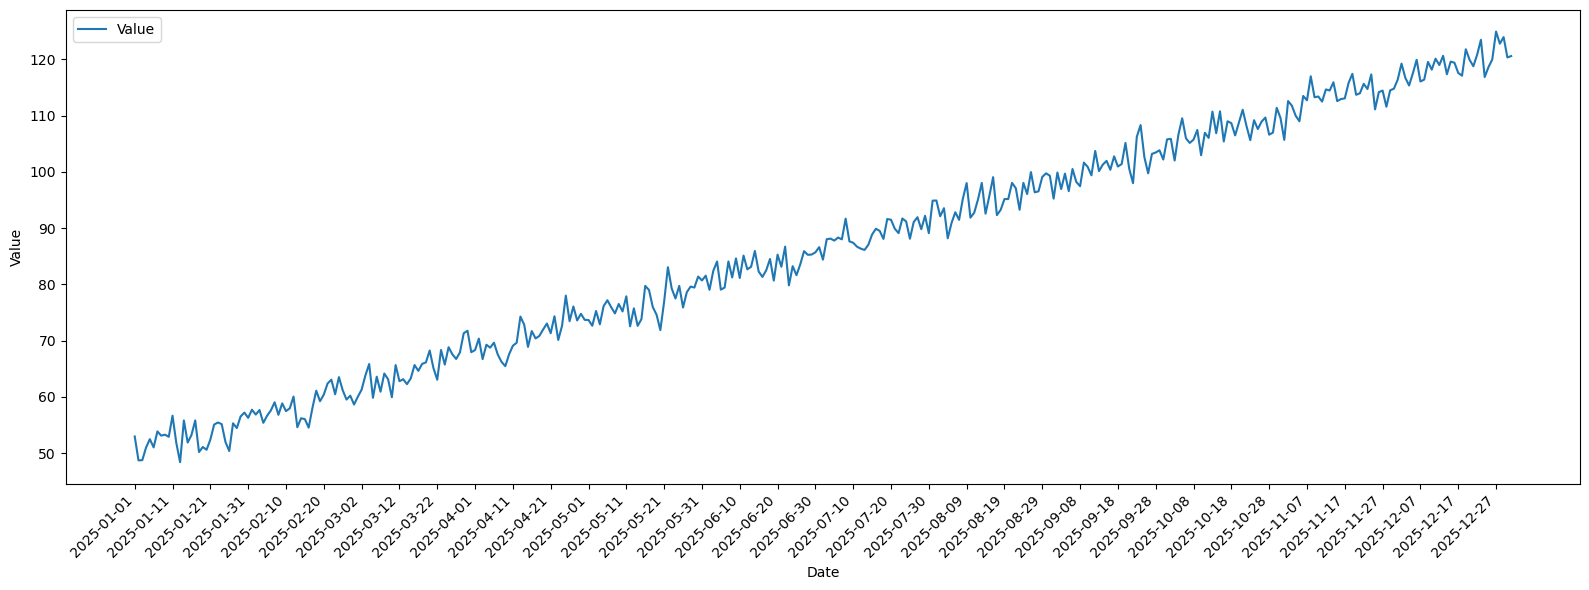

In [9]:
trend= pd.read_csv('../data/trend_daily_2025.csv')
plot_time_series(trend, x='Date', y='Value')

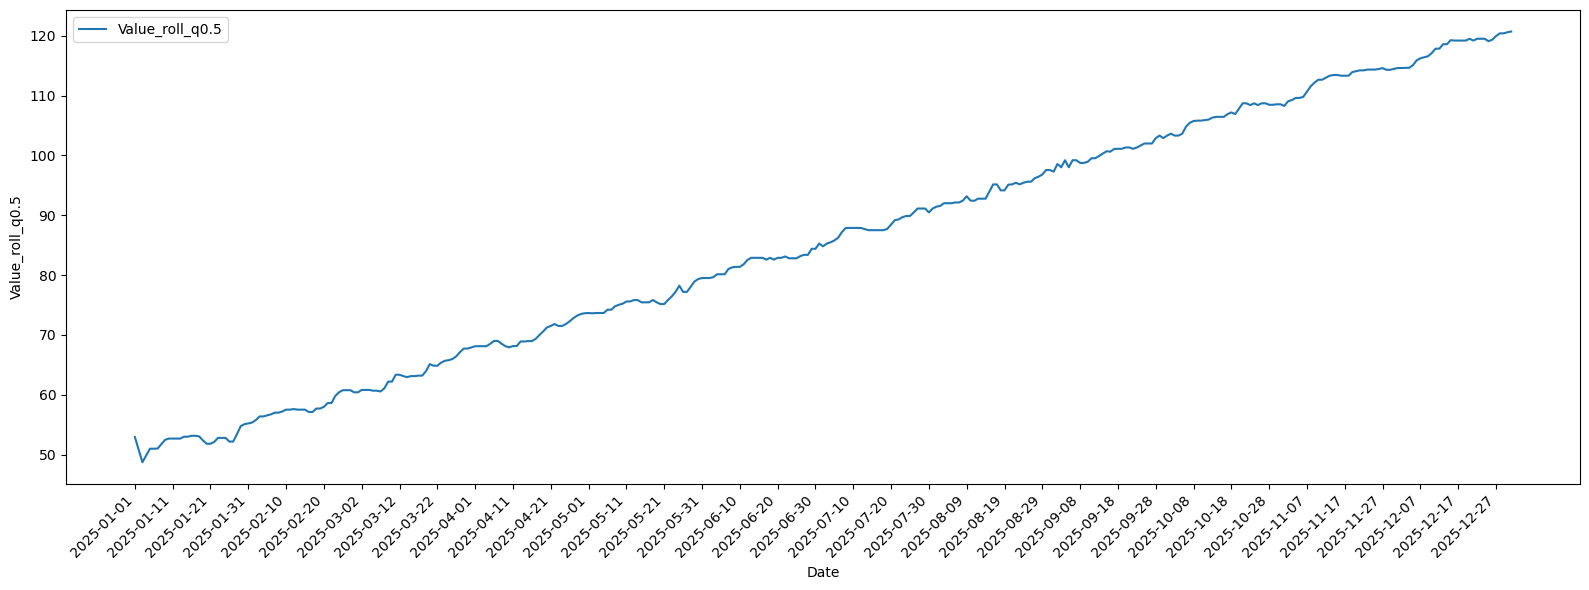

In [10]:
trend_mean= rolling_quantile(trend, 'Value',q=0.5, window=10)
plot_time_series(trend_mean, 'Date', 'Value_roll_q0.5')

In [11]:
temp_df = pd.read_csv("../data/solar_data_khulna_from_jan_2014_to_nov_2022.csv")
temp_df.head()

,Year,Month,Day,Hour,Temperature,Irradiance
0,2014,1,1,6,9.44,0.00
1,2014,1,1,7,11.87,99.09
2,2014,1,1,8,14.55,290.91
3,2014,1,1,9,17.81,492.71
4,2014,1,1,10,21.96,647.74


In [12]:
df_2014_18 = temp_df[temp_df['Year'].between(2014,2018)]
df_2014_18

,Year,Month,Day,Hour,Temperature,Irradiance
0,2014,1,1,6,9.44,0.00
1,2014,1,1,7,11.87,99.09
2,2014,1,1,8,14.55,290.91
3,2014,1,1,9,17.81,492.71
4,2014,1,1,10,21.96,647.74
...,...,...,...,...,...,...
43813,2018,12,31,19,16.18,0.00
43814,2018,12,31,20,15.30,0.00
43815,2018,12,31,21,14.49,0.00
43816,2018,12,31,22,13.76,0.00


In [13]:
df_2014_18["datetime"] = pd.to_datetime(df_2014_18[["Year", "Month", "Day", "Hour"]])
df_2014_18 = df_2014_18.drop(columns=["Year", "Month", "Day", "Hour"])

df_2014_18.head()

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_17380\4130199832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014_18["datetime"] = pd.to_datetime(df_2014_18[["Year", "Month", "Day", "Hour"]])


,Temperature,Irradiance,datetime
0,9.44,0.00,2014-01-01 06:00:00
1,11.87,99.09,2014-01-01 07:00:00
2,14.55,290.91,2014-01-01 08:00:00
3,17.81,492.71,2014-01-01 09:00:00
4,21.96,647.74,2014-01-01 10:00:00


In [14]:
df_2014_18= df_2014_18[['datetime','Temperature']].reset_index(drop=True)
display(df_2014_18.head())
df_2014_18.count()

,datetime,Temperature
0,2014-01-01 06:00:00,9.44
1,2014-01-01 07:00:00,11.87
2,2014-01-01 08:00:00,14.55
3,2014-01-01 09:00:00,17.81
4,2014-01-01 10:00:00,21.96


datetime       43818
Temperature    43818
dtype: int64

In [15]:
pd.DataFrame.to_csv(df_2014_18,'../data/temperature_2014_18.csv')

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_17380\3524301245.py:13: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax.plot_date(xv, yvals, "-", label=y, zorder=2)


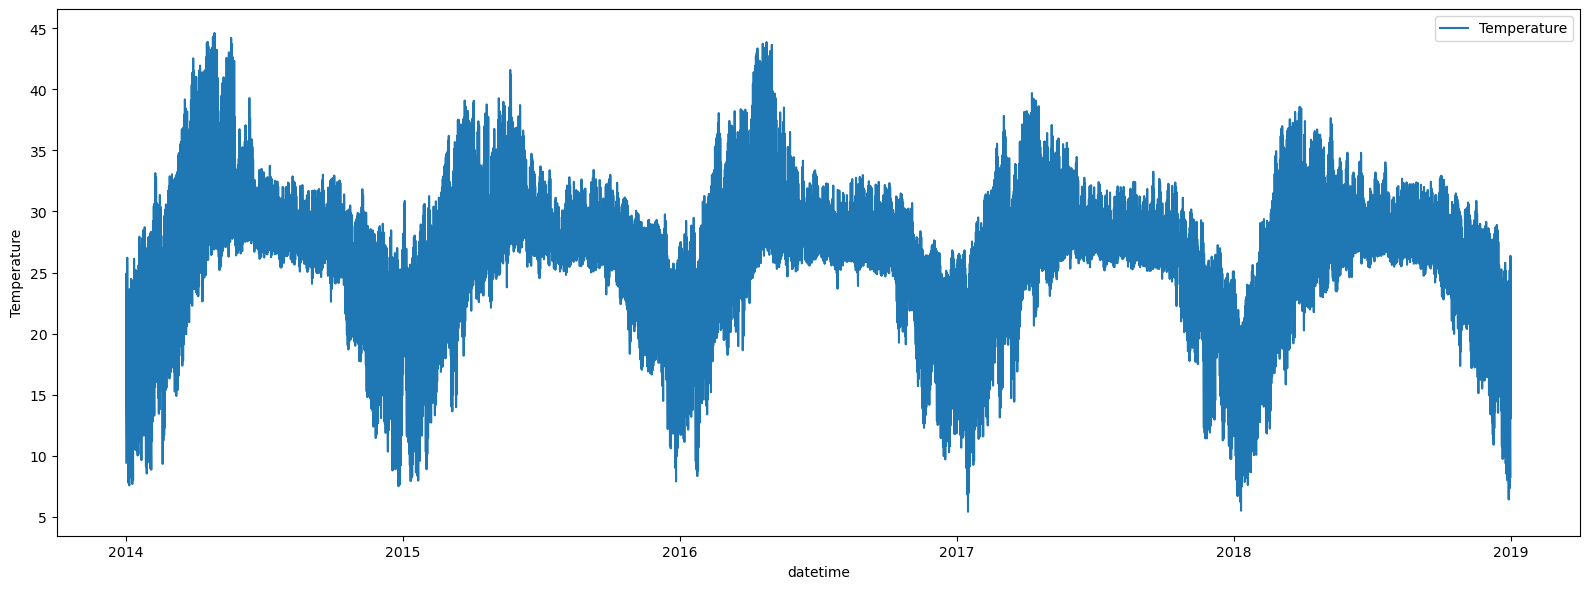

In [16]:
plot_time_series(df_2014_18,x="datetime", y='Temperature')

,datetime,Temperature,Temperature_roll_mean
0,2014-01-01 06:00:00,9.44,9.440000
1,2014-01-01 07:00:00,11.87,10.655000
2,2014-01-01 08:00:00,14.55,11.953333
3,2014-01-01 09:00:00,17.81,13.417500
4,2014-01-01 10:00:00,21.96,15.126000


C:\Users\Abdullah\AppData\Local\Temp\ipykernel_17380\3524301245.py:13: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax.plot_date(xv, yvals, "-", label=y, zorder=2)


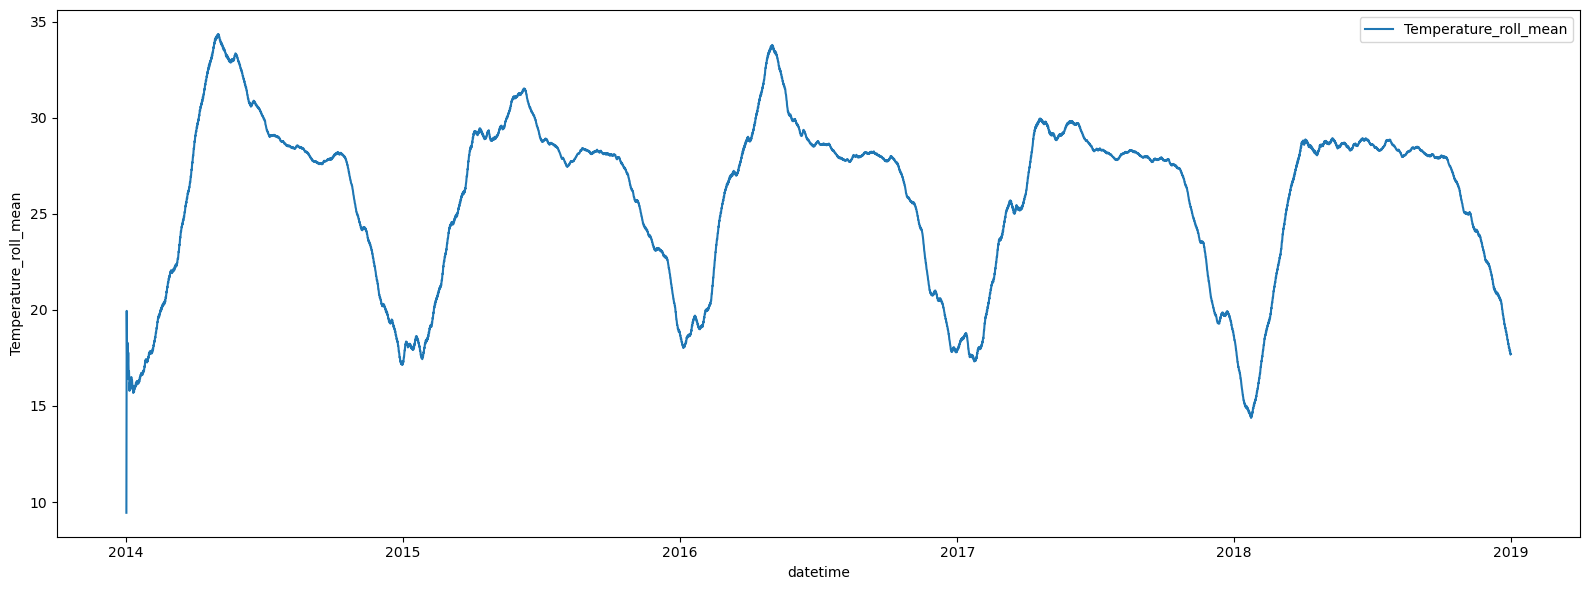

In [17]:
df_2014_18_mean = pd.read_csv('../output/temperature_2014_18_mean/rolling.csv')
df_2014_18_mean= df_2014_18_mean[['datetime','Temperature','Temperature_roll_mean']]
df_2014_18_mean['datetime'] = pd.to_datetime(df_2014_18_mean['datetime'])

display(df_2014_18_mean.head())
plot_time_series(df_2014_18_mean, x='datetime',y='Temperature_roll_mean')

,datetime,Temperature,Temperature_roll_std
0,2014-01-01 06:00:00,9.44,0.000000
1,2014-01-01 07:00:00,11.87,1.215000
2,2014-01-01 08:00:00,14.55,2.086981
3,2014-01-01 09:00:00,17.81,3.114156
4,2014-01-01 10:00:00,21.96,4.408431


C:\Users\Abdullah\AppData\Local\Temp\ipykernel_17380\3524301245.py:13: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax.plot_date(xv, yvals, "-", label=y, zorder=2)


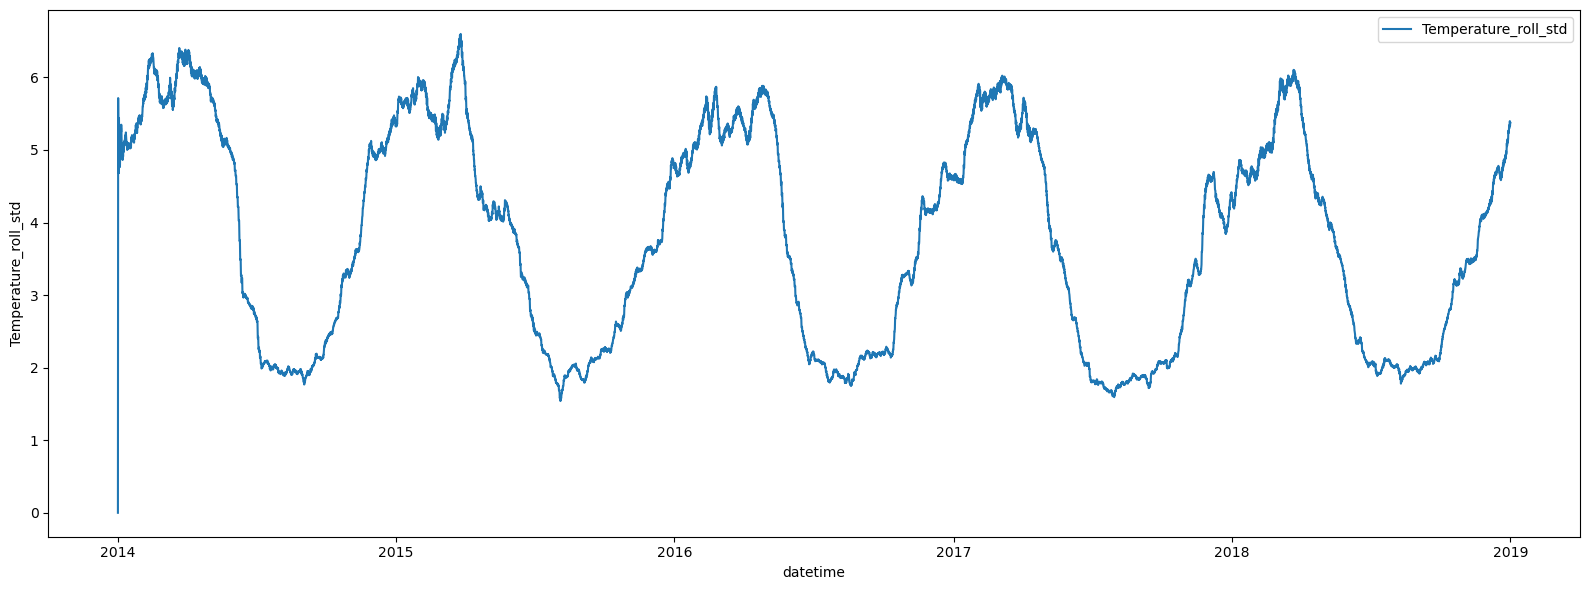

In [18]:
df_2014_18_std = pd.read_csv('../output/temperature_2014_18_std/rolling.csv')
df_2014_18_std= df_2014_18_std[['datetime','Temperature','Temperature_roll_std']]
df_2014_18_std['datetime'] = pd.to_datetime(df_2014_18_std['datetime'])

display(df_2014_18_std.head())
plot_time_series(df_2014_18_std, x='datetime',y='Temperature_roll_std')

In [23]:
def plot_2 (df: pd.DataFrame, x: str, y1: str, y2: str):
    fig, ax1 = plt.subplots(figsize=(16,6))

    # ---- First axis (Temperature)
    ax1.plot(df[x], df[y1], color="cornflowerblue", label=y1.replace('_',' ').title())
    ax1.set_xlabel(x.title())
    ax1.set_ylabel(y1.replace('_',' ').title(), color="cornflowerblue")
    ax1.tick_params(axis='y', labelcolor="cornflowerblue")

    # ---- Second axis (Rolling STD)
    ax2 = ax1.twinx()
    ax2.plot(df[x], df[y2], color="red", label=y2.replace('_',' ').title())
    ax2.set_ylabel(y2.replace('_',' ').title(), color="red")
    ax2.tick_params(axis='y', labelcolor="red")

    # ---- Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right")

    plt.tight_layout()
    plt.show()

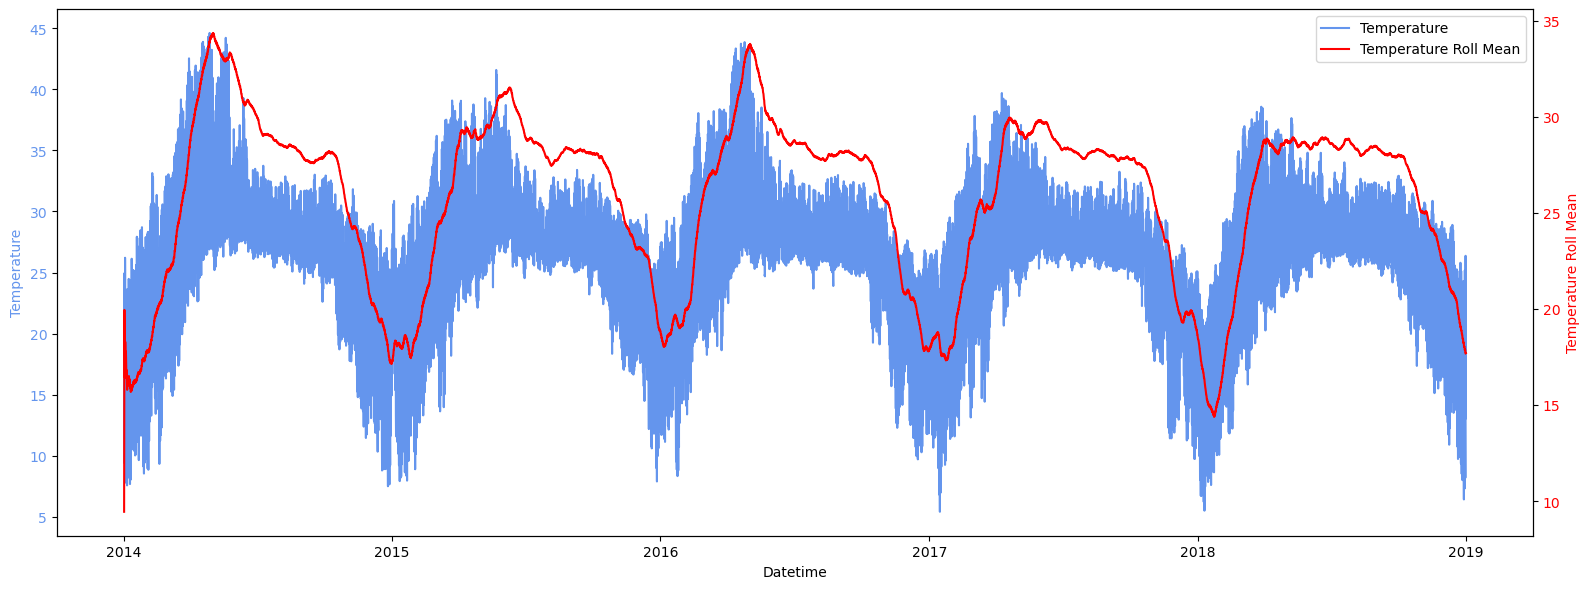

In [24]:
plot_2(df=df_2014_18_mean,x='datetime',y1='Temperature',y2='Temperature_roll_mean')

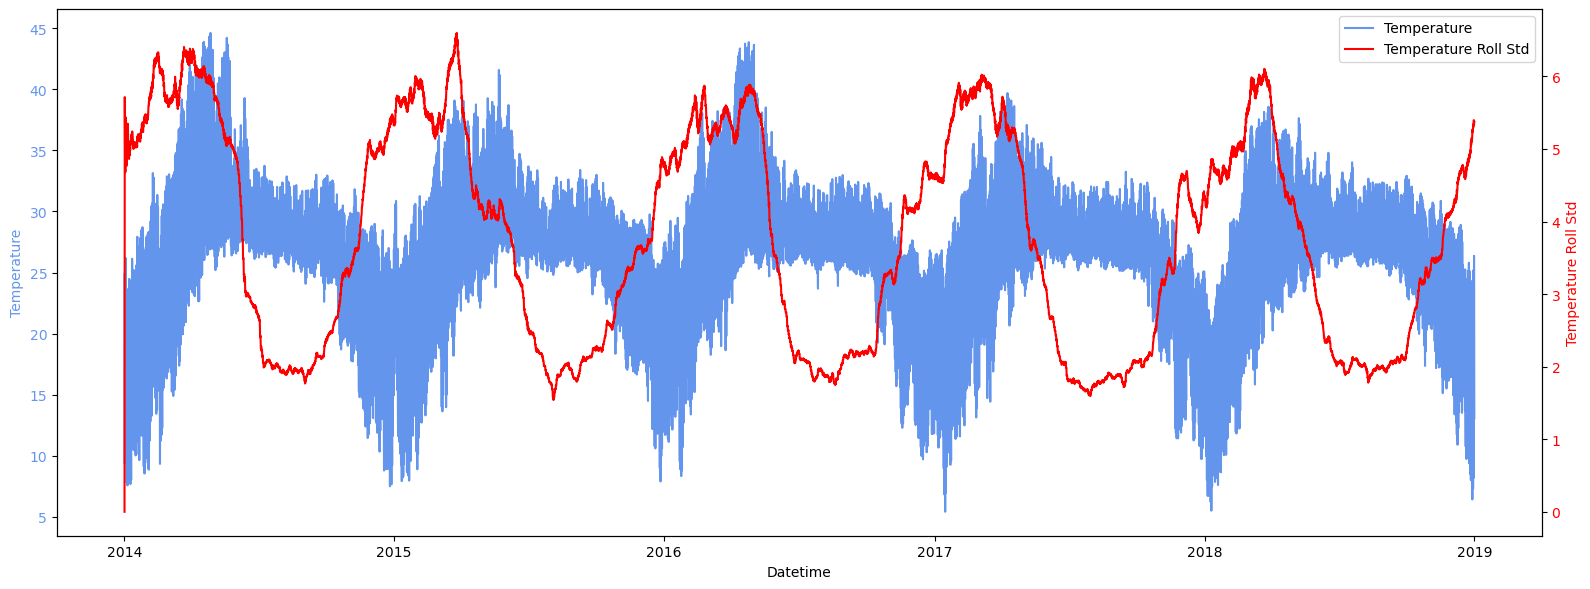

In [25]:
plot_2(df=df_2014_18_std,x='datetime',y1='Temperature',y2='Temperature_roll_std')